In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import researchpy as rp
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("promotion.csv")

In [3]:
data

employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
5            58896          Analytics   region_2        Bachelor's      m   
6            20379         Operations  region_20        Bachelor's      f   
7            16290         Operations  region_34  Master's & above      m   
8            73202          Analytics  region_20        Bachelor's      m   
9            28911  Sales & Marketing   region_1  Master's & above      m   
10           29934         Technology  region_23               NaN      m   
11           49017  Sales & Marketing   region_7        Bachelor's      f   
12           60051  Sales & Marketing   region_4        Bachelor's      m   
13           38401         Technology  region_29  Master's & above      m   
14           77040                R&D   region_2  Master's & above      m   
15           43931         Operations   region_7        Bachelor's      m   
16            7152         Technology   region_2        Bachelor's      m   
17            9403  Sales & Marketing  region_31        Bachelor's      m   
18           17436  Sales & Marketing  region_31        Bachelor's      m   
19           54461         Operations  region_15        Bachelor's      m   
20           12067        Procurement  region_14        Bachelor's      m   
21           33332         Operations  region_15               NaN      m   
22           58789            Finance  region_11        Bachelor's      f   
23           71177        Procurement   region_5        Bachelor's      m   
24           52057            Finance  region_22  Master's & above      m   
25           26585         Technology  region_22        Bachelor's      m   
26           37749        Procurement  region_26        Bachelor's      m   
27            2370         Technology  region_26        Bachelor's      m   
28            8219          Analytics   region_5        Bachelor's      m   
29           74759  Sales & Marketing   region_4        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54778        30691        Procurement   region_2        Bachelor's      f   
54779        49923         Technology  region_30        Bachelor's      f   
54780        73767         Operations  region_19        Bachelor's      f   
54781        76497                 HR  region_27        Bachelor's      f   
54782        17281         Operations   region_2   Below Secondary      m   
54783        45504        Procurement   region_2   Below Secondary      m   
54784        68370  Sales & Marketing  region_30        Bachelor's      m   
54785        42055         Technology  region_26        Bachelor's      m   
54786        32291  Sales & Marketing  region_31        Bachelor's      f   
54787        77455         Technology  region_27        Bachelor's      m   
54788        75164  Sales & Marketing  region_13        Bachelor's      f   
54789        75942  Sales & Marketing   region_7  Master's & above      m   
54790        67988                 HR   region_2        Bachelor's      f   
54791        27274         Technology  region_11        Bachelor's      m   
54792          994  Sales & Marketing  region_14        Bachelor's      m   
54793        28400         Technology   region_2        Bachelor's      m   
54794        35000         Operations  region_16        Bachelor's      m   
54795        13477        Procurement  region_15  Master's & above      m   
54796        12592  Sales & Marketing  region_25  Master's & above      m   
54797        62450  Sales & Marketing  region_11        Bachelor's      m   
547

In [4]:
rp.summary_cat(data['Outcome'])

Variable  Outcome  Count  Percent
0  Outcome        0  50140    91.48
1                 1   4668     8.52

In [43]:
#EDA -Exploratory data analysis using machine learning algorithms
data.shape

(54808, 13)

In [44]:
data.tail()

employee_id         department     region         education gender  \
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  awards_won?  avg_training_score  Outcome  
54803                 17            0                  78        0  
54804                  6            0                  56        0  
54805                  3            0                  79        0  
54806                  2            0                  45        0  
54807                  5            0                  49        0

In [45]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
Outcome                    0
dtype: int64

In [46]:
da=data.fillna(1,inplace=True)

In [49]:
data.dropna(inplace=True)

In [50]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
Outcome                 0
dtype: int64

In [51]:
data.shape

(54808, 13)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 13 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               54808 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null float64
length_of_service       54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
Outcome                 54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


In [54]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score', 'Outcome'],
      dtype='object')

In [55]:
rp.summary_cat(data['age'])
data['age'].isnull().sum()


0

In [56]:
rp.summary_cat(data['employee_id'])
data['employee_id'].isnull().sum()

0

In [57]:
rp.summary_cat(data['department'])
data['department'].isnull().sum()

0

In [58]:
rp.summary_cat(data['region'])
data['region'].isnull().sum()

0

In [63]:
rp.summary_cat(data['education'])
data['education'].isnull().sum()

0

In [59]:
rp.summary_cat(data['gender'])
data['gender'].isnull().sum()

0

In [60]:
rp.summary_cat(data['recruitment_channel'])
data['recruitment_channel'].isnull().sum()

0

In [14]:
rp.summary_cat(data['no_of_trainings'])
data['no_of_trainings'].isnull().sum()

0

In [15]:
rp.summary_cat(data['age'])
data['age'].isnull().sum()

0

In [61]:
rp.summary_cat(data['previous_year_rating'])
data['previous_year_rating'].isnull().sum()

0

In [17]:
rp.summary_cat(data['length_of_service'])
data['length_of_service'].isnull().sum()

0

In [18]:
rp.summary_cat(data['awards_won?'])
data['awards_won?'].isnull().sum()

0

In [62]:
rp.summary_cat(data['avg_training_score'])
data['avg_training_score'].isnull().sum()

0

In [64]:
#FDA implementation
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score', 'Outcome'],
      dtype='object')

In [65]:
data.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          54808.000000   
mean   39195.830627         1.253011     34.803915              3.153992   
std    22586.581449         0.609264      7.660169              1.358545   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              2.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service   awards_won?  avg_training_score       Outcome  
count       54808.000000  54808.000000        54808.000000  54808.000000  
mean            5.865512      0.023172           63.386750      0.085170  
std             4.265094      0.150450           13.371559      0.279137  
min             1.000000      0.000000           39.000000      0.000000  
25%             3.000000      0.000000           51.000000      0.000000  
50%             5.000000      0.000000           60.000000      0.000000  
75%             7.000000      0.000000           76.000000      0.000000  
max            37.000000      1.000000           99.000000      1.000000

In [78]:
print(*list(data.gender.unique()))

f m


In [67]:
data.nunique(axis=0)

employee_id             54808
department                  9
region                     34
education                   4
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won?                 2
avg_training_score         61
Outcome                     2
dtype: int64

In [68]:
data.gender.value_counts

<bound method IndexOpsMixin.value_counts of 0        f
1        m
2        m
3        m
4        m
5        m
6        f
7        m
8        m
9        m
10       m
11       f
12       m
13       m
14       m
15       m
16       m
17       m
18       m
19       m
20       m
21       m
22       f
23       m
24       m
25       m
26       m
27       m
28       m
29       m
        ..
54778    f
54779    f
54780    f
54781    f
54782    m
54783    m
54784    m
54785    m
54786    f
54787    m
54788    f
54789    m
54790    f
54791    m
54792    m
54793    m
54794    m
54795    m
54796    m
54797    m
54798    f
54799    f
54800    m
54801    f
54802    m
54803    m
54804    f
54805    m
54806    m
54807    m
Name: gender, Length: 54808, dtype: object>

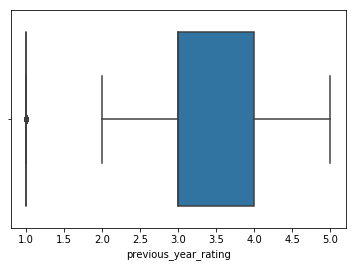

In [32]:
#using seaborns to using 
# import seaborn as sns
# sns.boxplot(x=data['previous_year_rating'])
# df_clean=data[data['previous_year_rating'].between(0,1.5)]
# df_clean.shape



In [ ]:
#toclean the back box
sns.boxplot(x=df_clean['previous_year_rating'])

(0, 13)

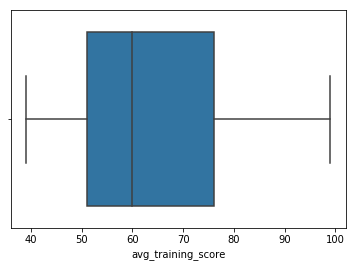

In [69]:
#using seaborns to using 
import seaborn as sns
sns.boxplot(x=data['avg_training_score'])
df_clean=data[data['avg_training_score'].between(0,0.8)]
df_clean.shape

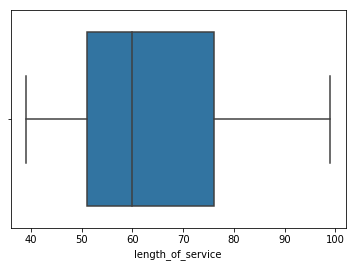

In [76]:
#using seaborns to using 
import seaborn as sns
sns.boxplot(x=data['avg_training_score'])
df_clean=data[data['avg_training_score'].between(0,0.8)]
df_clean.shape
sns.boxplot(x=df_clean['length_of_service'])

(0, 13)

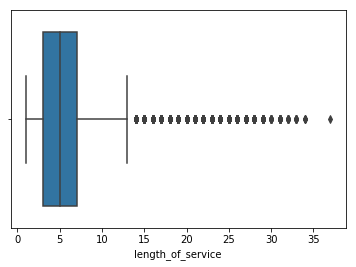

In [70]:
#using seaborns to using 
import seaborn as sns
sns.boxplot(x=data['length_of_service'])
df_clean=data[data['length_of_service'].between(0,0.8)]
df_clean.shape


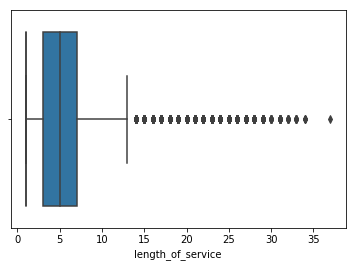

In [75]:
#using seaborns to using 
import seaborn as sns
sns.boxplot(x=data['length_of_service'])
df_clean=data[data['length_of_service'].between(0,1.5)]
df_clean.shape
sns.boxplot(x=df_clean['length_of_service'])